Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data Collection & Processing

In [5]:
# load the data from csv file to Pandas DataFrame
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

In [104]:
test_df.dtypes

Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
Title            object
Family_Size     float64
Family_Cat     category
dtype: object

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [10]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.drop('PassengerId', axis = 1, inplace = True)

In [12]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df = pd.read_csv('/test.csv', index_col = 'PassengerId')

In [14]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [17]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [18]:
train_df["Survived"].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [20]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [22]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [23]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


##EDA - Phân tích khai phá dữ liệu

In [24]:
#Survived
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Survived'], **{})
chart

In [25]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


In [26]:
#Sex
train_df["Sex"].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Sex'], **{})
chart

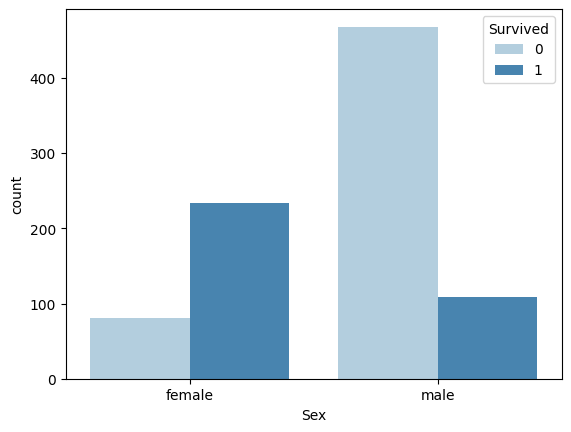

In [27]:
sns.countplot(data = train_df, x= 'Sex',hue='Survived', palette = 'Blues');

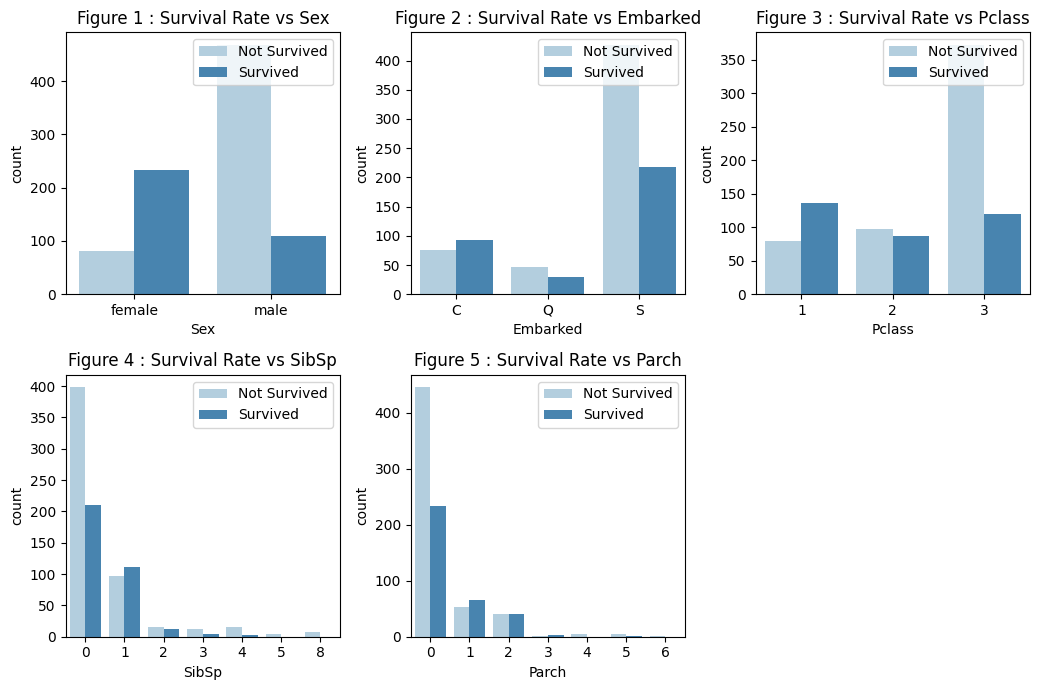

In [28]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range (0, n_rows):
  for c in range (0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data = train_df, x= cols[i], hue = 'Survived',palette = 'Blues', ax=ax_i)
      ax_i.set_title(f"Figure {i+1} : Survival Rate vs {cols[i]}")
      ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

##Num

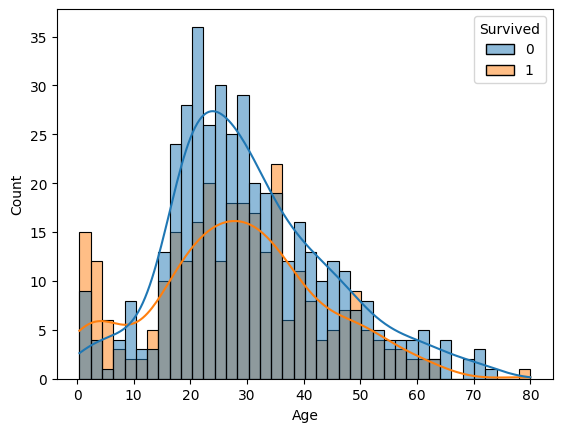

In [29]:
sns.histplot(data=train_df,x='Age', bins = 40,hue = 'Survived', kde =True);

In [30]:
#Fare
train_df ["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

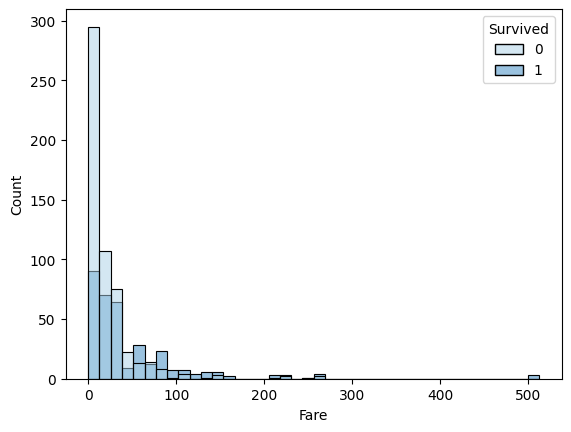

In [31]:
sns.histplot(data=train_df,x='Fare', bins = 40,hue = 'Survived',palette = 'Blues');


<Axes: xlabel='Fare', ylabel='count'>

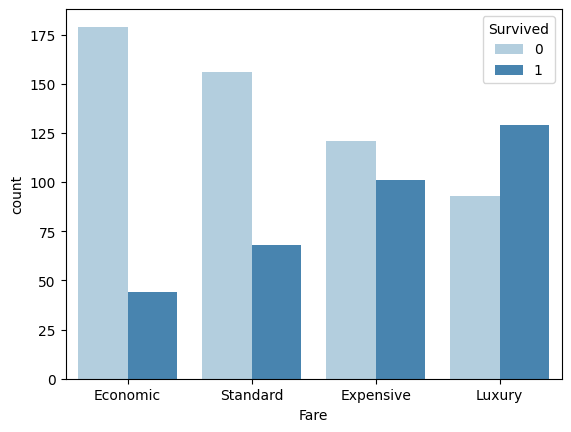

In [32]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x=quartile_data, hue = train_df['Survived'], palette = 'Blues')

In [33]:
#Name
train_df['Name'].head(5)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [34]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [37]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [43]:
import re

def extract_tittle(name):
  p = re.compile(r",([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()
train_df['Title']  = train_df['Name'].apply(lambda name : extract_tittle(name))


In [44]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [41]:
#train_df['Name'].str.contains('Mrs. Martin').sum()

1

In [45]:
test_df['Title'] = test_df['Name'].apply(lambda name : extract_tittle(name))

In [46]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

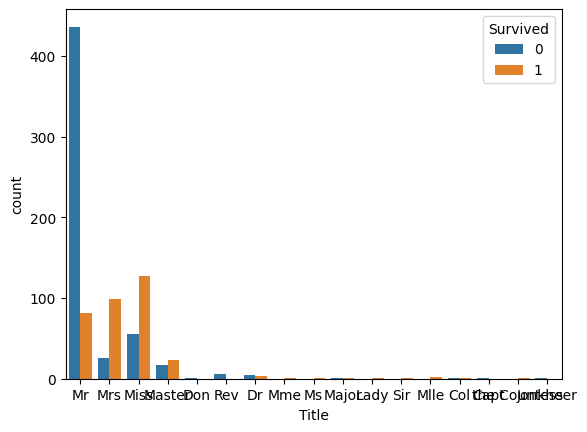

In [47]:
#sns.countplot(data = train_df, x = 'Title', hue= 'Survived');

In [51]:
def group_title(title) :
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return "Miss"
  else :
    return "Others"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [50]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

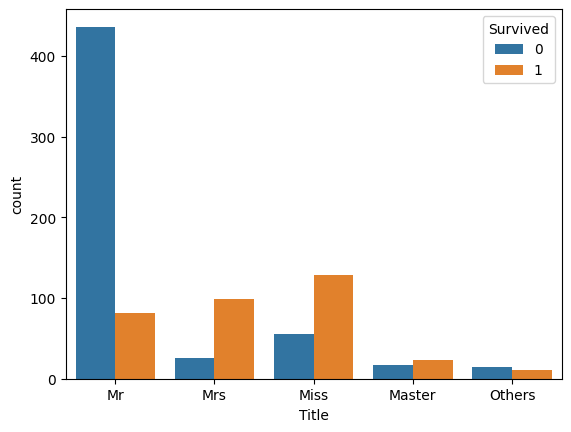

In [53]:
sns.countplot(data=train_df, x = 'Title', hue= 'Survived')

In [101]:
#Family
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [112]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [113]:
test_df['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

In [114]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels=['Solo','Small','Medium','Large'])

In [116]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels=['Solo','Small','Medium','Large'])

In [117]:
test_df['Family_Cat']

PassengerId
892      Solo
893     Small
894      Solo
895      Solo
896     Small
        ...  
1305     Solo
1306     Solo
1307     Solo
1308     Solo
1309    Small
Name: Family_Cat, Length: 418, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

<Axes: xlabel='Family_Cat', ylabel='count'>

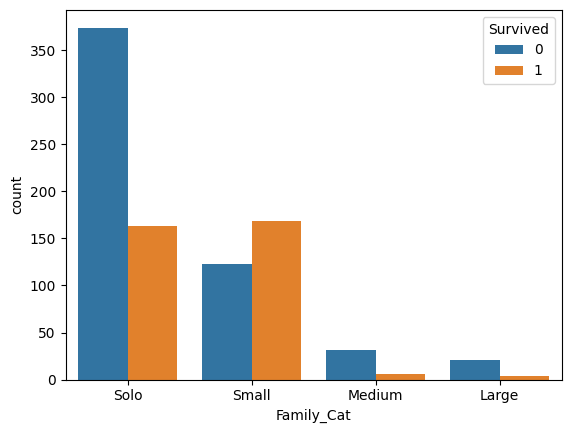

In [79]:
sns.countplot(data = train_df, x ='Family_Cat', hue = 'Survived')

##Data Wrangling

In [118]:
num_features = ['Age', 'Fare']
cat_feature = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_feature
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [119]:
def display_missing(df, feature_cols) :
  n_rows = df.shape[0]
  for col in feature_cols :
    missing_count = df[col].isnull().sum()
    if missing_count > 0 :
      print(f"Col{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df, feature_cols)

ColEmbarked has 0.22% missing values.


In [121]:
display_missing(test_df, feature_cols)

ColFare has 0.24% missing values.


In [122]:
#filling missing values with median
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']

<ipython-input-122-c2f6b9d4715b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


In [123]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [71]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

<ipython-input-71-4963b322e413>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))


In [72]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

<ipython-input-72-f3b1e2a1590f>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))


In [124]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

ColEmbarked has 0.22% missing values.
ColFare has 0.24% missing values.


In [82]:
X= train_df[feature_cols]
Y= train_df['Survived']

In [144]:
X_test = test_df[feature_cols]

In [130]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline ( steps =
   [('imputer', SimpleImputer(strategy = 'median'))  ,
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline ( steps =
   [('imputer', SimpleImputer(strategy = 'most_frequent'))  ,
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [135]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer,num_features),
    ('cat', cat_transformer,cat_feature)
])

In [136]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [137]:
X = preprocessor.transform(X)

In [145]:
X_test = preprocessor.transform(X_test)

In [141]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)

##ModelTraining

In [148]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [149]:
X_test.shape

(418, 19)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

##LogisticRegression

In [151]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [152]:
log_reg.score(X_val, Y_val)

0.8100558659217877

In [155]:
Y_pred = log_reg.predict(X_val)

In [157]:
precision_score(Y_val,Y_pred), recall_score(Y_val, Y_pred)

(0.7333333333333333, 0.7096774193548387)

In [161]:
print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       117
           1       0.73      0.71      0.72        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



##Decision Tree

In [165]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [166]:
decision_tree.score(X_val, Y_val)

0.8212290502793296

##Cross-vadiation

In [167]:
from sklearn.model_selection import cross_val_score

In [169]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)
lr_scores = cross_val_score(log_reg_cv,X, Y, scoring='accuracy', cv= 5)

In [177]:
#lr_scores
#lr_scores.mean()
lr_scores.std()

0.020466357172416235